In [43]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


In [84]:
os.chdir('c:/data/bosh/python/')
oof = pd.read_csv("../subs/oob55157.csv")
print oof.columns
thresholds = np.linspace(0.001, 0.999, 100)

Index([u'Id', u'Prediction', u'Response', u'DATE_S32max', u'GF0', u'GF1'], dtype='object')


('best_threshold :', 0.25302020202020203, 'mcc max : ', 0.46141739008817279, 'oo shape', (1183747, 6))


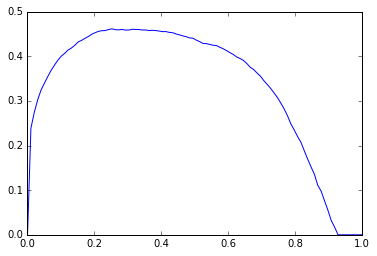

In [74]:
#ALL rows
oo = oof
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.001, 'mcc max : ', 0.0, 'oo shape', (85, 6))


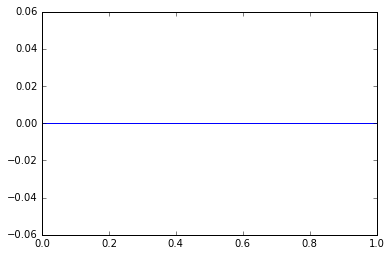

In [75]:
#GF1 and S32 = 100% TRUE
oo = oof.loc[(oof['GF1'] == 1) & (oof['DATE_S32max'].notnull())]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.5856868686868687, 'mcc max : ', 0.4382504900892783, 'oo shape', (289, 6))


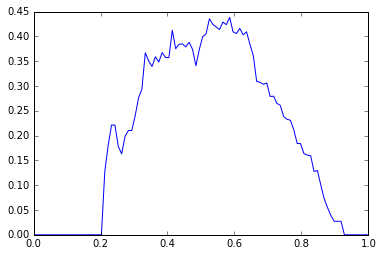

In [77]:
#GF1 without S32 
oo = oof.loc[(oof['GF1'] == 1) & (oof['DATE_S32max'].isnull() ) ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.10180808080808081, 'mcc max : ', 0.94067023027489916, 'oo shape', (167, 6))


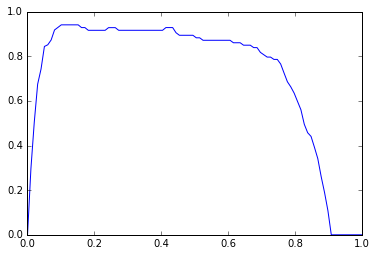

In [73]:
#GF0 + S32 
oo = oof.loc[(oof['GF0'] == 1) & (oof['DATE_S32max'].notnull() ) ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.25302020202020203, 'mcc max : ', 0.79953921736397349, 'oo shape', (1111, 6))


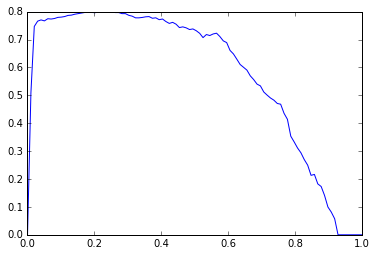

In [79]:
# GF0 without S32
oo = oof.loc[(oof['GF0'] == 1) & (oof['DATE_S32max'].isnull() ) ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.4143131313131313, 'mcc max : ', 0.82008844381336321, 'oo shape', (24543, 6))


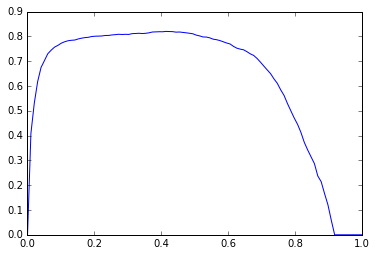

In [80]:
#ONLY S32
oo = oof.loc[oof['DATE_S32max'].notnull() ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.25302020202020203, 'mcc max : ', 0.36402952877577582, 'oo shape', (1159204, 6))


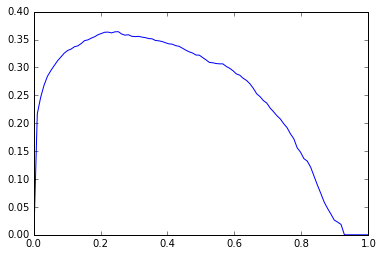

In [81]:
#WITHOUT S32
oo = oof.loc[oof['DATE_S32max'].isnull() ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)

('best_threshold :', 0.21269696969696969, 'mcc max : ', 0.29234118879636184, 'oo shape', (1157808, 6))


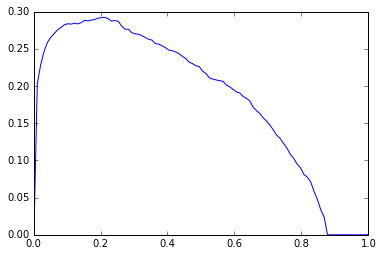

In [82]:
#WITHOUT S32 GF1 GF0
oo = oof.loc[ (oof['DATE_S32max'].isnull() ) & (oof['GF0'] == 0) & (oof['GF1'] == 0) ]
thresholds = np.linspace(0.001, 0.999, 100)
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape)